# Fall 2022 Data Science Intern Challenge

## Candidate: **Ikwuonwu Jonathan Ukaegbu**

**Problem:** 

[Click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

Given some sample data, write a program to answer the following: 

On Shopify, we have exactly *100 sneaker shops*, and each of these shops sells only *one model of shoe*. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30-day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. 

- Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


In [5]:
# import statements for all of the packages 
import pandas as pd  
import numpy as np  
import csv 
import seaborn as sns
import matplotlib.pyplot as plt

# 'magic word' so that your visualizations are plotted
%matplotlib inline

In [10]:
# Displaying the top 10 rows of the dataset
# Load and Read the CSV File Using Pandas read_csv function
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', sep=',')

#printing first ten rows with defined columns of tmdb-movies database
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [7]:
# What does the last five rows of the DataFrame look like?
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


## Displaying the dimensions of the dataset

In [9]:
# Look at the number of observations and columns in the dataset
print(df.shape)

(5000, 7)


In [11]:
# Make sure all of the shop ids are equal to the number of sneaker shops
df.shop_id.value_counts()

# The problem states that there are 100 sneaker shops and there are 100 unique
#   shop_ids, so that tells me that I can assume these are all the sneaker

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

**Descriptive Summary Statistics on Raw Data.**

In [12]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


After looking at the statistical data, it is seen that there are some outliers in the `order_amount` feature. this table is telling me that the mean (average) of this feature (column) is `$3145.128000`, however the 50th percentile is only `284.000000'.


In [13]:
#checking to verify that there are no blank rows
df.isnull().values.any()

False

In [14]:
#checking to ensure that all dates are within the 30 days range
df= df.sort_values(by="created_at")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25


In [15]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
244,245,32,928,202,2,cash,2017-03-30 9:30:28
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40
145,146,72,906,640,4,cash,2017-03-30 9:55:00


It can be seen from the two tables that the dates are within the 30days period

### Visualizations

**Using a histogram to visualize what the data looks like for each column.**

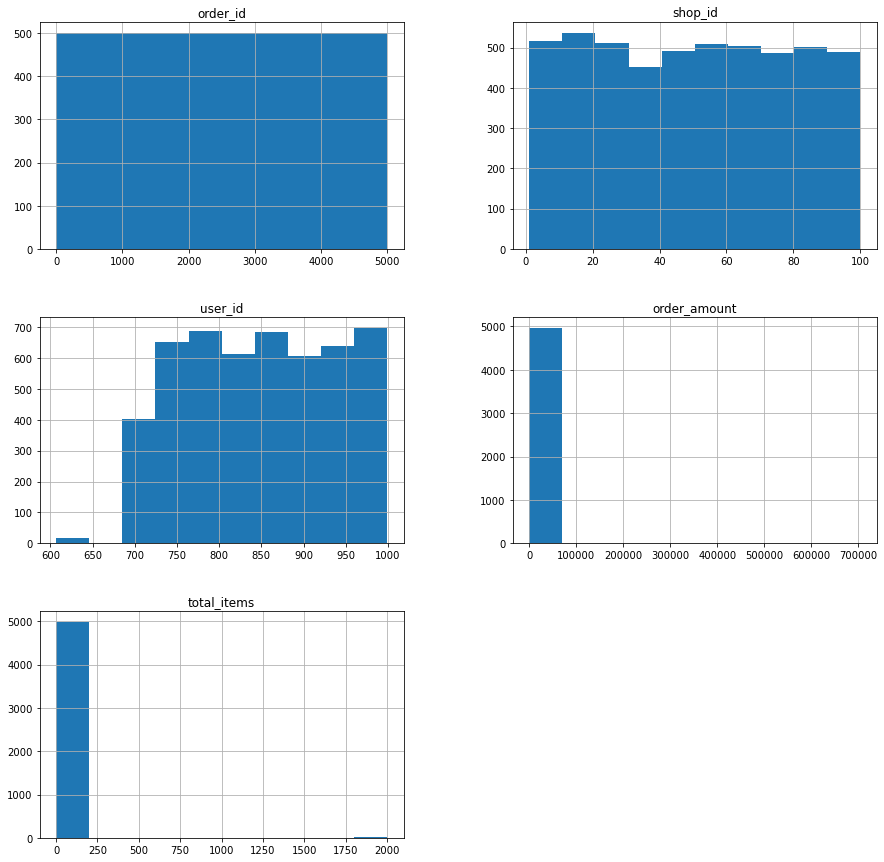

In [17]:
df.hist(figsize=(15,15));

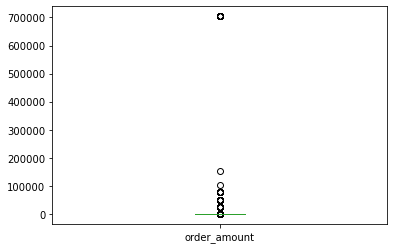

In [32]:
# Plot out the order amounts using a box plot
df.order_amount.plot(kind='box');

# a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### Notes: How was the 3145.13 AOV calculated?

In [19]:
#count of Total_items rows. let the total_items of row be denoted as TIRC(total_items_row_count) 
TIRC = df['total_items'].count()
TIRC

5000

In [20]:
#sum of order_amount denoted as SOA(Sum_of_order_amount)
SOA= df['order_amount'].sum()
SOA

15725640

The incorrect calculation was found by dividing the sum of order_amount by the total number of rows

In [31]:
#the incorrected average order value was gotten using. 
incorrectAOV = SOA / TIRC
incorrectAOV = str(round(incorrectAOV, 2))
incorrectAOV

'3145.13'

The AOV is typically calculated by dividing the sum of sales by the sum of items sold (the mean). In addition, we can derive great information from the mode and median of the order amount column. 

# b. What metric would you report for this dataset?

The metric that should be reported for this dataset is  is to sum all orders amount and divide bythe number of items in the order. However the mean can be skewed, due to outliers in pricing as within this dataset, so it is important to use other metric such as the mode and the median, using this other metrics gives us a complete view of the dataset

# c. What is its value?

In [27]:
sum_of_total_items = df['total_items'].sum()
sum_of_total_items 

43936

In [28]:
AOV = SOA / sum_of_total_items 
AOV = str(round(AOV, 3))
AOV

'357.922'

In [29]:
mode = df['order_amount'].mode()[0]
mode

153

In [30]:
median = df['order_amount'].median()
median

284.0